In [15]:
# K-Means Clustering
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [1]:
import pandas  as pd

data = pd.read_csv ('https://docs.google.com/spreadsheets/d/e/2PACX-1vSbBMdipcbcCrHjKd0xWjEitYfdVQiLmIlX52R-pMvkET6o9KxnRo3pyJWpyIZE6FuXM0TCABFKd-Jr/pub?output=csv')

data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [8]:
from google.colab import files
uploaded = files.upload()


Saving Mall_Customers.csv to Mall_Customers (1).csv


In [9]:
dataset = pd.read_csv ('Mall_Customers.csv')
X = dataset.iloc[:,[3,4]].values
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


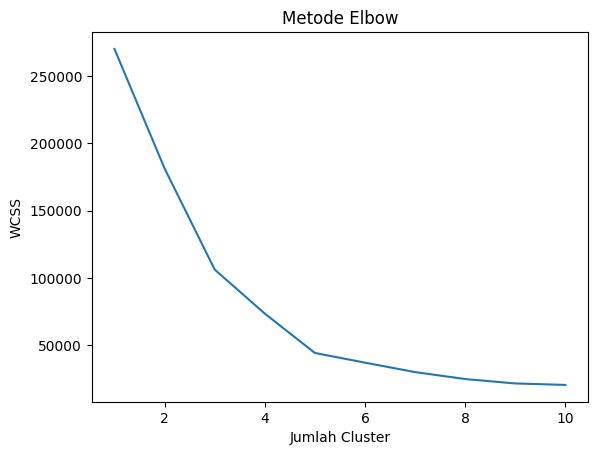

In [16]:
# menggunakan metode elbow untuk menemukan jumlah cluster yang optimal

from sklearn.cluster import KMeans
wcss =[]
for i in range (1,11):
    kmeans =KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

#plot grafik untuk memvisualisasikan metode elbow untuk menemukan cluster yang optimal
# WCSS adalah jumlah kuadrat jarak antara setiap titik dan pusat massa dalam sebuah cluster.
plt.plot(range(1,11),wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

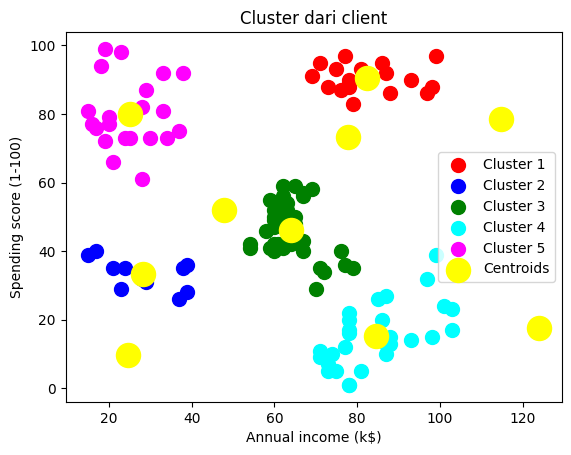

In [20]:
# Menerapkan Kmeans ke dataset dengan jumlah cluster optimal

kmeans =KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1],s = 100, c='red', label = 'Cluster 1')

plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],s = 100, c='blue', label = 'Cluster 2')

plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1],s = 100, c='green', label = 'Cluster 3')

plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3,1],s = 100, c='cyan', label = 'Cluster 4')

plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4,1],s = 100, c='magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Cluster dari client')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()